In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [17]:
covid_df = pd.read_csv('updated_covid_deaths_us (1).csv', header=2)
covid_df.head()

,State,Date,New Deaths,7-Day Moving Avg,Historic Deaths
0,United States,Feb 23 2022,2800,1674,0
1,United States,Feb 22 2022,3078,1613,0
2,United States,Feb 21 2022,754,1582,0
3,United States,Feb 20 2022,387,1862,0
4,United States,Feb 19 2022,546,1885,0


In [18]:
covid_df = covid_df.drop(columns={'State'})

In [19]:
covid_df['Date'] =  pd.to_datetime(covid_df['Date'])


In [20]:
covid_df = covid_df.set_index('Date')
covid_df

,New Deaths,7-Day Moving Avg,Historic Deaths
Date,,,
2022-02-23,2800,1674,0
2022-02-22,3078,1613,0
2022-02-21,754,1582,0
2022-02-20,387,1862,0
2022-02-19,546,1885,0
...,...,...,...
2020-01-27,0,0,0
2020-01-26,0,0,0
2020-01-25,0,0,0


Text(0, 0.5, 'Deaths')

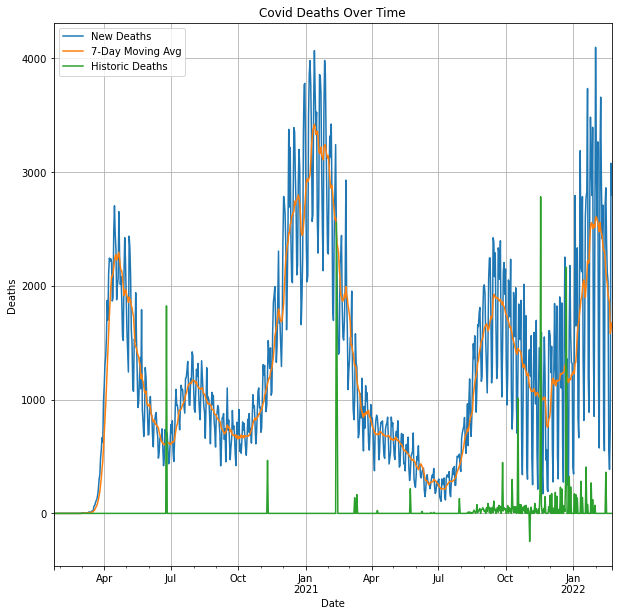

In [30]:
trend = covid_df.plot(figsize=(10,10))
trend.set_title("Covid Deaths Over Time")
trend.grid()
trend.set_ylabel("Deaths")

In [72]:
hosp_df = pd.read_csv('hospital_utilization.csv')
c_df = pd.read_csv('updated_covid_deaths_us (1).csv', header=2)
vax_df = pd.read_csv('vaccine_data.csv')
vax_df = vax_df.drop(columns={'Daily Increase'})

In [73]:
c_df['Date'] = pd.to_datetime(c_df['Date'])
hosp_df['Date'] = pd.to_datetime(hosp_df['Date'])
merged_df = pd.merge(c_df, hosp_df, on = 'Date', how='left')
merged_df = merged_df.drop(columns={'State', 'Historic Deaths', '7-Day Moving Avg'})
merged_df = merged_df.dropna()

In [74]:
merged_df = merged_df.set_index('Date')
merged_df['Current Hospitalized COVID-19 Patients'].value_counts()


0.00        191
34246.14      2
39674.29      2
71408.29      2
26808.29      1
           ... 
20527.14      1
19518.00      1
36148.86      1
35427.57      1
22784.00      1
Name: Current Hospitalized COVID-19 Patients, Length: 560, dtype: int64

In [75]:
merged_df

,New Deaths,Current Hospitalized COVID-19 Patients
Date,,
2022-02-13,550,82055.86
2022-02-12,820,85521.43
2022-02-11,2709,89003.00
2022-02-10,2413,92676.86
2022-02-09,2869,97626.00
...,...,...
2020-01-27,0,0.00
2020-01-26,0,0.00
2020-01-25,0,0.00


Text(0.5, 1.0, 'New Deaths v COVID-19 Patients')

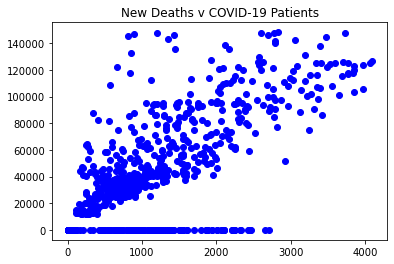

In [88]:
x = merged_df['New Deaths']
y = merged_df['Current Hospitalized COVID-19 Patients']
plt.scatter(x, y, color='b')
plt.title ('New Deaths v COVID-19 Patients')

In [114]:
vax_df['Date'] = pd.to_datetime(vax_df['Date'])
merged_2 = pd.merge(c_df, vax_df, on='Date', how='left')
merged_2 = merged_2.drop(columns={'State', 'Historic Deaths', '7-Day Moving Avg'})

In [115]:
merged_2 = merged_2.dropna()
merged_2 = merged_2.set_index('Date')

In [116]:
merged_2['Total Doses Administered'] = merged_2['Total Doses Administered']/1000000

,New Deaths,Total Doses Administered
Date,,
2022-02-13,550,548.792878
2022-02-12,820,548.648777
2022-02-11,2709,548.321220
2022-02-10,2413,547.739194
2022-02-09,2869,547.266020
...,...,...
2020-01-27,0,0.000000
2020-01-26,0,0.000000
2020-01-25,0,0.000000


In [124]:
merged_2 = merged_2.rename(columns={'Total Doses Administered':'Total Doses Administered (millions)'})
merged_2 = merged_2.loc[merged_2['Total Doses Administered (millions)'] != 0]
merged_2

,New Deaths,Total Doses Administered (millions)
Date,,
2022-02-13,550,548.792878
2022-02-12,820,548.648777
2022-02-11,2709,548.321220
2022-02-10,2413,547.739194
2022-02-09,2869,547.266020
...,...,...
2020-12-17,3353,0.514275
2020-12-16,3391,0.242019
2020-12-15,2765,0.082354


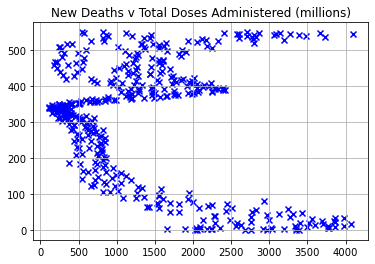

In [130]:
x1 = merged_2['New Deaths']
y1 = merged_2['Total Doses Administered (millions)']

plt.scatter(x1, y1, marker='x', color='b')
plt.title ('New Deaths v Total Doses Administered (millions)')
plt.grid()